* [WA_Fn-UseC_-HR-Employee-Attrition.csv] : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#Part5. [실습3] HR 데이터를 활용한 직원 이탈 요인 분석

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch05. [실습3] HR 데이터를 활용한 직원 이탈 요인 분석" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

In [2]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

In [8]:
# from matplotlib import pyplot as plt
# plt.rc('font', family='NanumBarunGothic')

### 0. 데이터 불러오기

In [3]:
# %pip install imblearn

In [4]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations
from statsmodels.stats.proportion import proportion_confint

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
attrition = pd.read_csv("../3. Data/Ch 05/WA_Fn-UseC_-HR-Employee-Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# 데이터의 모양 알아보기
###### 코드 작성 부분 시작 ######
attrition.shape
###### 코드 작성 부분 마침 ######

(1470, 35)

### 1. 데이터 탐색

#### 1) 변수 간 관계 시각화

##### KDE Plot

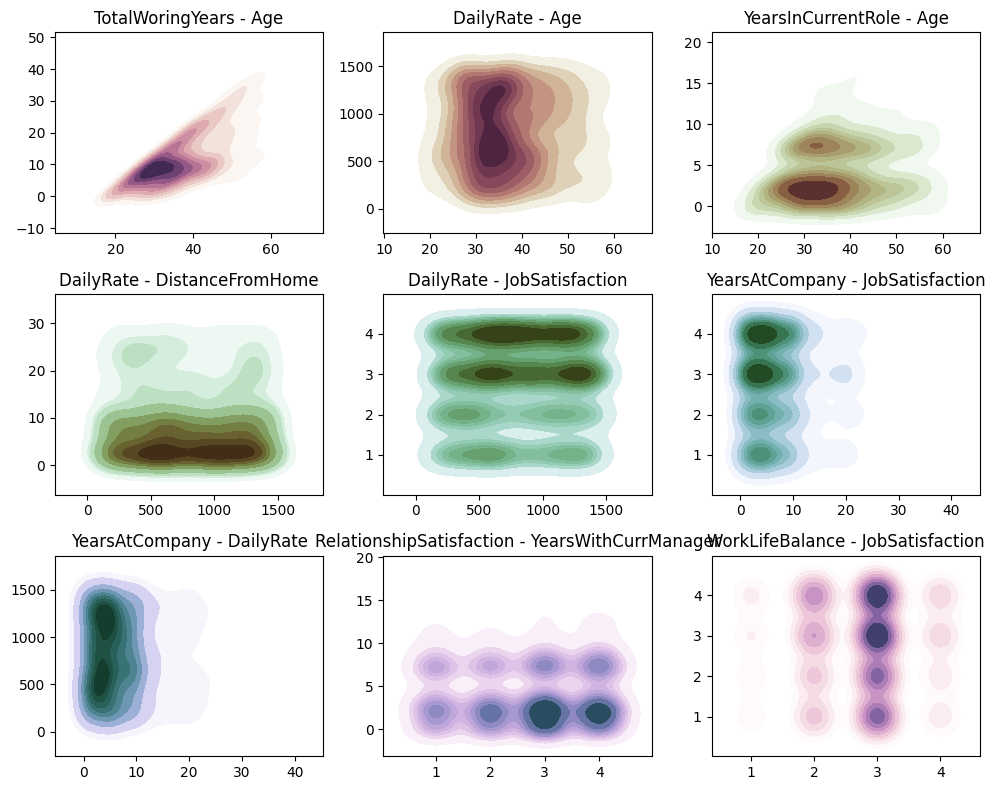

In [8]:
# 여러 개의 KDE Plot 생성 준비
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Plot 색상 설정
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

x = attrition['Age'].values
y = attrition['TotalWorkingYears'].values
sns.kdeplot(x = x, y = y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
# plt.xlabel("Age")
# plt.ylabel("TotalWorkingYears")
axes[0,0].set( title = 'TotalWoringYears - Age')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot
x = attrition['Age'].values
y = attrition['DailyRate'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'DailyRate - Age')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['Age'].values
y = attrition['YearsInCurrentRole'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'YearsInCurrentRole - Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['DistanceFromHome'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'DailyRate - DistanceFromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['DailyRate'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'DailyRate - JobSatisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'YearsAtCompany - JobSatisfaction')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = attrition['YearsAtCompany'].values
y = attrition['DailyRate'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'YearsAtCompany - DailyRate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = attrition['RelationshipSatisfaction'].values
y = attrition['YearsWithCurrManager'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'RelationshipSatisfaction - YearsWithCurrManager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = attrition['WorkLifeBalance'].values
y = attrition['JobSatisfaction'].values
sns.kdeplot(x = x, y= y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorkLifeBalance - JobSatisfaction')

f.tight_layout()

### 2. 데이터 전처리
  * 결측값 처리
  * 중복값 처리

#### 1) 결측값 처리

In [9]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

#### 2) 중복값 처리

In [10]:
# 중복된 항목 수 알아보기
###### 코드 작성 부분 시작 ######
np.where(attrition.duplicated() == True)
###### 코드 작성 부분 마침 ######

(array([], dtype=int64),)

### 3. Target Feature 정의
* 방법1 : Pandas 의 apply 이용
* 방법2 : y.isin([Target에 해당하는 컬럼들]).astype('int') 이용

In [11]:
attrition.head().T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [12]:
# 퇴직 여부(Yes/No)에 따라 각각 1, 0 으로 할당
target_map = {'Yes':1, 'No':0}

# pandas apply 를 이용하여 퇴직 여부를 1, 0 으로 표시한 새로운 컬럼 생성
###### 코드 작성 부분 시작 ######
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x : target_map[x])
###### 코드 작성 부분 마침 ######
attrition["Attrition_numerical"].value_counts()

0    1233
1     237
Name: Attrition_numerical, dtype: int64

In [17]:
y = attrition['Attrition'].copy()
###### 코드 작성 부분 시작 ######
y = y.isin(["Yes"]).astype("int")
###### 코드 작성 부분 마침 ######
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### 4. 데이터 타입별 Feature 변환

#### 1) Feature 탐색

##### 총 Feature 개수 확인

In [18]:
###### 코드 작성 부분 시작 ######
attrition.info()
###### 코드 작성 부분 마침 ######

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Feature 데이터 타입별 개수 확인

In [19]:
# 데이터 타입별 컬럼 수 확인
dtype_data = attrition.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

display(dtype_data)

,Column Type,Count
0,int64,27
1,object,9


#### 2) 범주형 Feature
  * 데이터 확인
  * Feature 별 개수 시각화
  * 날짜/숫자/기간 등으로 변환해야 할 항목이 있는지 확인
  * Feature 별 개수 시각화
  * Feature 의 개수가 인코딩에 적합한가?

##### 데이터 확인

In [20]:
# pandas 의 select_dtypes 사용하여 범주형 데이터만 확인하기
###### 코드 작성 부분 시작 ######
attrition.select_dtypes(include=["object"])
###### 코드 작성 부분 마침 ######

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


##### Feature 제거

> Feature 별 유일한 값 개수 확인

In [21]:
cat_feat = attrition.select_dtypes('object','category').columns.values
attrition_cat = attrition[cat_feat].copy()
print(attrition_cat.nunique().sort_values())

Over18            1
Attrition         2
Gender            2
OverTime          2
BusinessTravel    3
Department        3
MaritalStatus     3
EducationField    6
JobRole           9
dtype: int64


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거한다
* Target Feature 가 포함되어 있으면 함께 제거

In [40]:
cat_feat = attrition.select_dtypes('object','category').columns.values
attrition_cat = attrition[cat_feat].copy()

In [78]:
###### 코드 작성 부분 시작 ######
attrition.drop(columns = "Over18", inplace = True)
attrition.drop(columns = "Attrition", inplace = True)
attrition_cat = attrition[cat_feat].copy()
###### 코드 작성 부분 마침 ######

attrition.select_dtypes("object", "category")

KeyError: "['Over18'] not found in axis"

##### Feature 별 개수 시각화

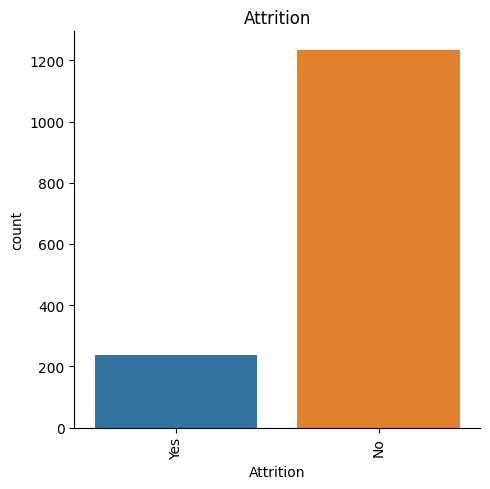

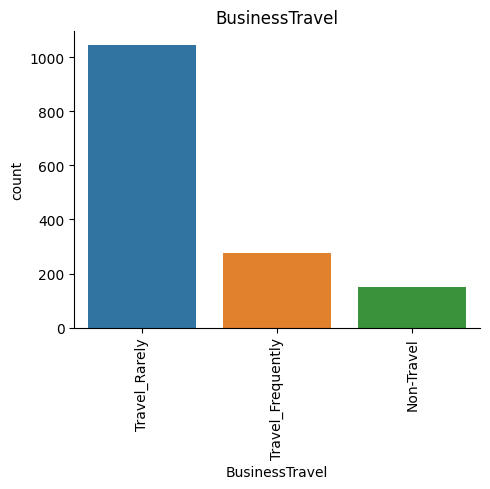

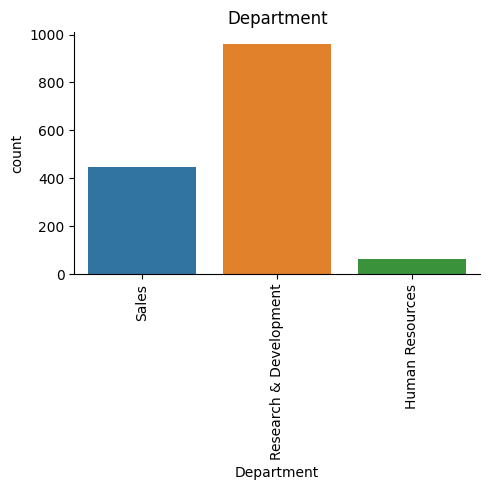

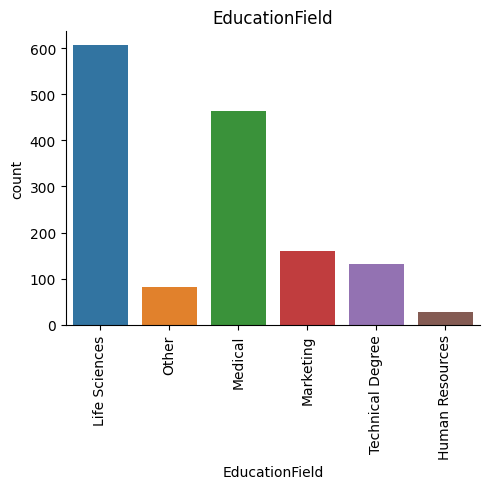

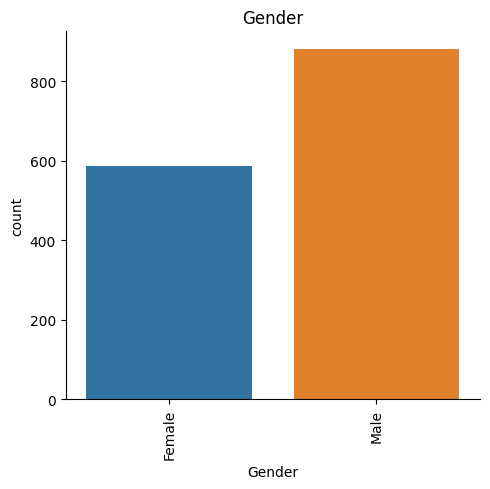

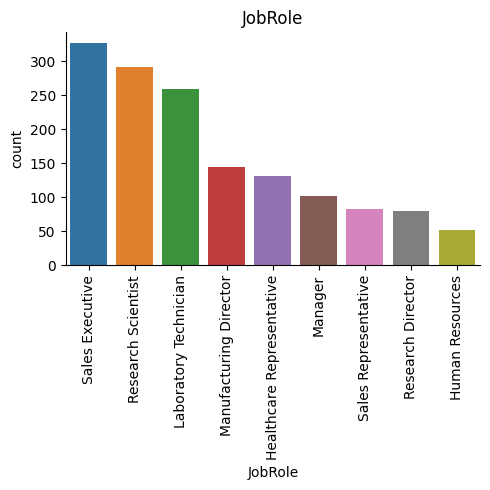

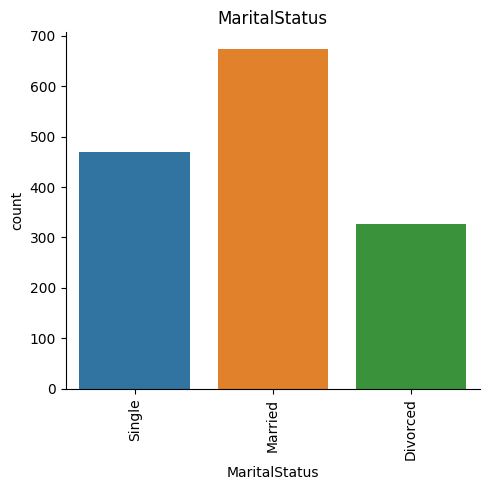

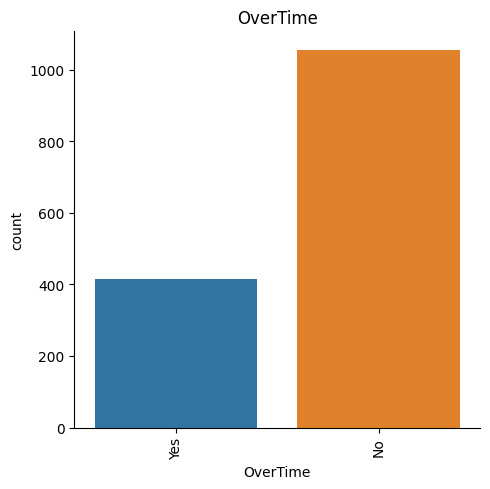

In [41]:
for col in attrition_cat.columns:
  fig = sns.catplot(x=col, kind="count", data=attrition_cat, hue=None)
  fig.set_xticklabels(rotation=90)
  plt.title(col)
  plt.tight_layout()
  plt.show()

##### Feature 의 개수가 인코딩에 적합한가?
  * 인코딩을 했을 경우 메모리 문제가 발생하지는 않는가?

> Feature 인코딩
* LabelEncoder : LabelEncoder 는 선형성을 가지는 머신러닝 기법에 쓰면 좋지 않다
* OneHotEncoder vs. get_dummies

In [42]:
attrition_cat_dummies = pd.get_dummies(attrition_cat)
attrition_cat_dummies.head(3)

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [77]:
len(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'])

28

In [75]:
from sklearn.preprocessing import OneHotEncoder

###### 코드 작성 부분 시작 ######
ohe = OneHotEncoder()
attrition_cat_ohe = ohe.fit_transform(attrition_cat).toarray()
###### 코드 작성 부분 마침 ######
attrition_cat_ohe = pd.DataFrame(attrition_cat_ohe)
attrition_cat_ohe.columns = ['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']

print("OneHot Encoder 결과 : ")  
print(attrition_cat_ohe.iloc[:,:2])

ValueError: Length mismatch: Expected axis has 30 elements, new values have 28 elements

#### 3) 숫자형 Feature
  * 데이터 확인
  * Feature 제거
  * Feature Skewness 확인

##### 데이터 확인

In [ ]:
# pandas 의 select_dtypes('object') 사용
attrition.select_dtypes(include=['number']).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0


In [ ]:
attrition.select_dtypes(include=np.number).head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0


In [ ]:
num_feat = attrition.select_dtypes('number').columns.values
attrition_num = attrition[num_feat].copy()

##### Feature 제거

> Feature 별 유일한 값 개수 확인

In [ ]:
print(attrition_num.nunique().sort_values())

EmployeeCount                  1
StandardHours                  1
Attrition_numerical            2
PerformanceRating              2
WorkLifeBalance                4
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
EmployeeNumber              1470
dtype: int64


In [ ]:
print(attrition.shape)

(1470, 36)


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거한다
* Target Feature 가 포함되어 있으면 함께 제거

In [ ]:
attrition_num = attrition_num.drop(['StandardHours','EmployeeCount','EmployeeNumber','Attrition_numerical'], axis=1, errors='ignore')

##### Feature Skewness 확인

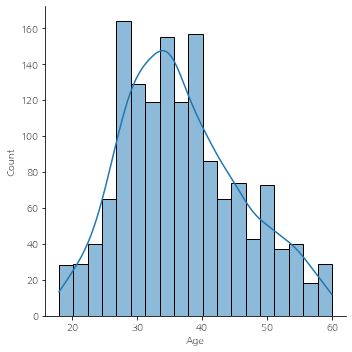

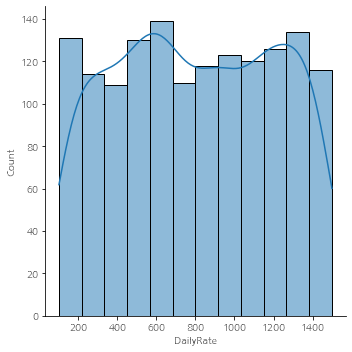

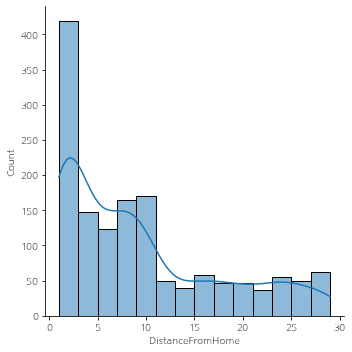

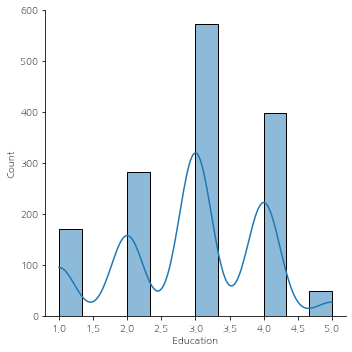

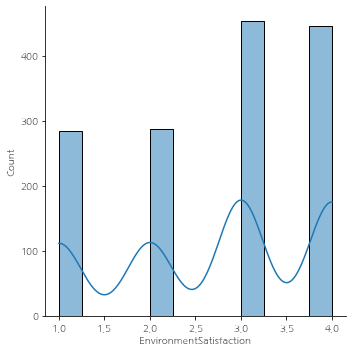

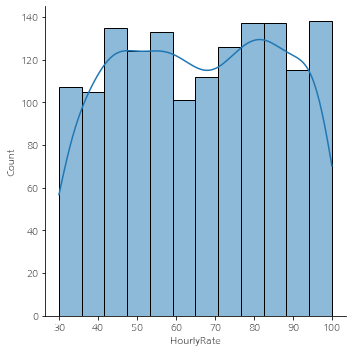

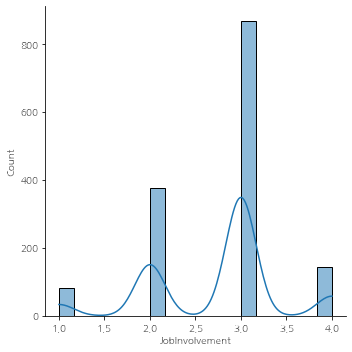

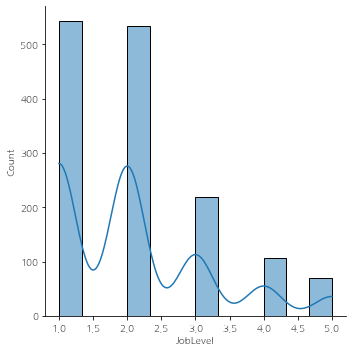

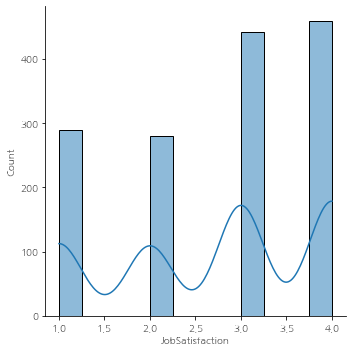

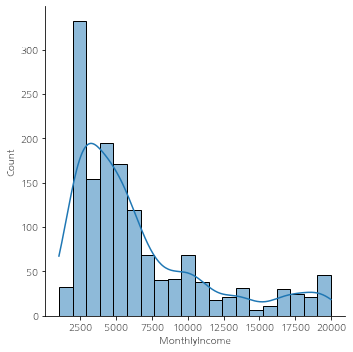

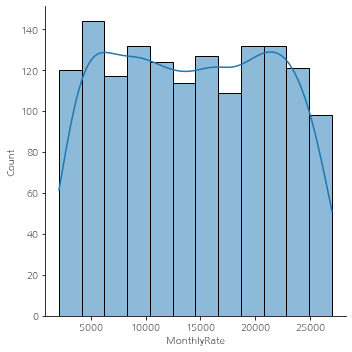

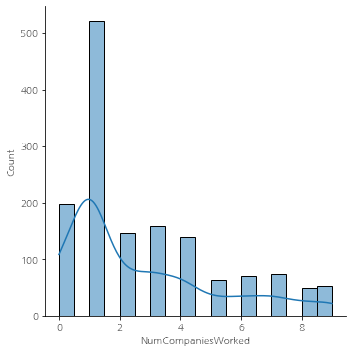

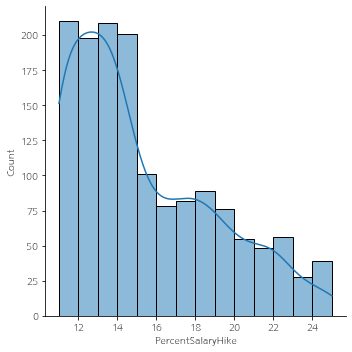

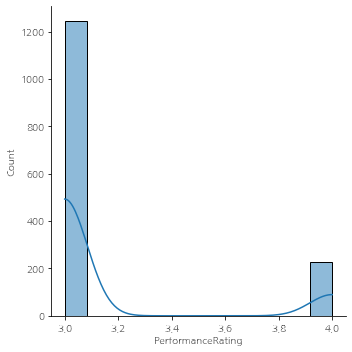

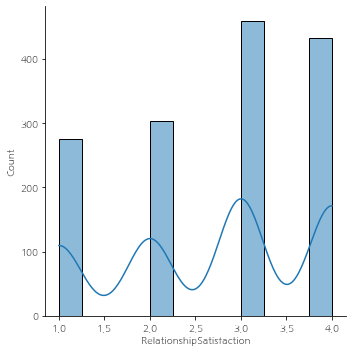

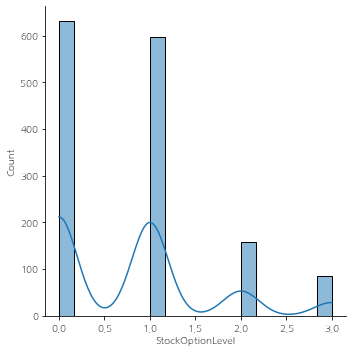

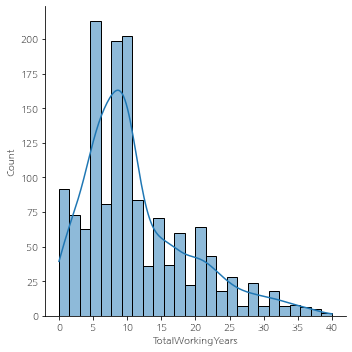

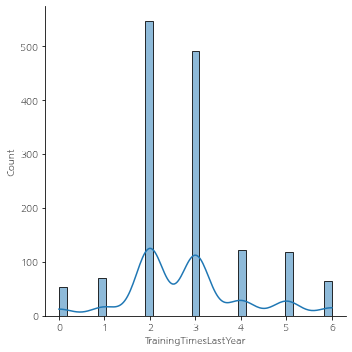

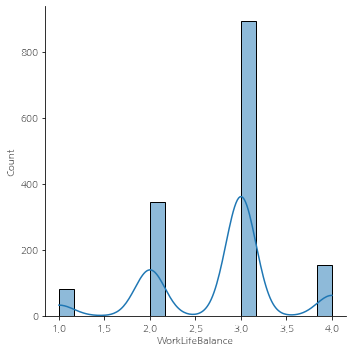

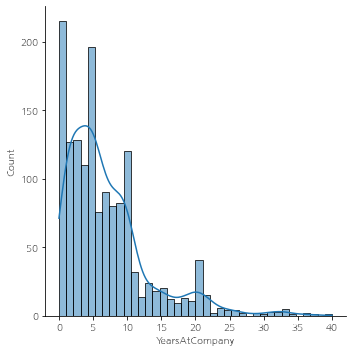

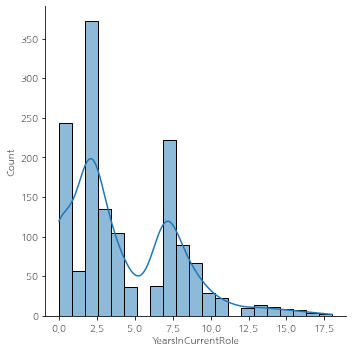

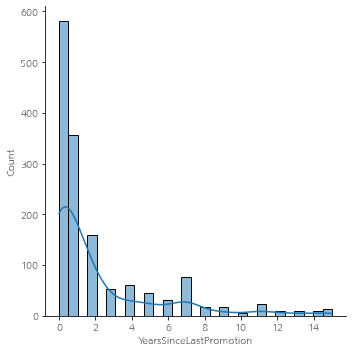

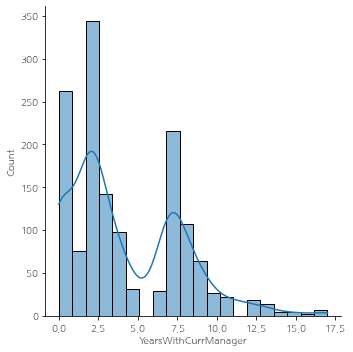

In [ ]:
col_attrition_num = attrition_num.columns.values
for i in range(0,len(col_attrition_num)):
    sns.displot(attrition_num[col_attrition_num[i]],kde=True) # kde : kernel density

### 5. 상관성에 따른 Feature 정제

#### 1) 숫자형 Feature
  * 데이터 확인
  * 숫자형 컬럼들 간 Pearson R 상관 계수를 구한다
  * 상관 계수가 0.9 이상인 컬럼들 중 가장 큰 컬럼을 제거해 본다
  * 컬럼들 간 조합 생성 : comb_num_feat = np.array(list(combinations(num_feat, 2)))
  * Pearson R 상관 계수 구하기 : pearsonr(x1, x2)[0]

##### 데이터 확인

In [ ]:
attrition_num.nunique().sort_values()

PerformanceRating              2
WorkLifeBalance                4
EnvironmentSatisfaction        4
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
Education                      5
JobLevel                       5
TrainingTimesLastYear          7
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate                    71
DailyRate                    886
MonthlyIncome               1349
MonthlyRate                 1427
dtype: int64

##### Feature 간 관계 시각화

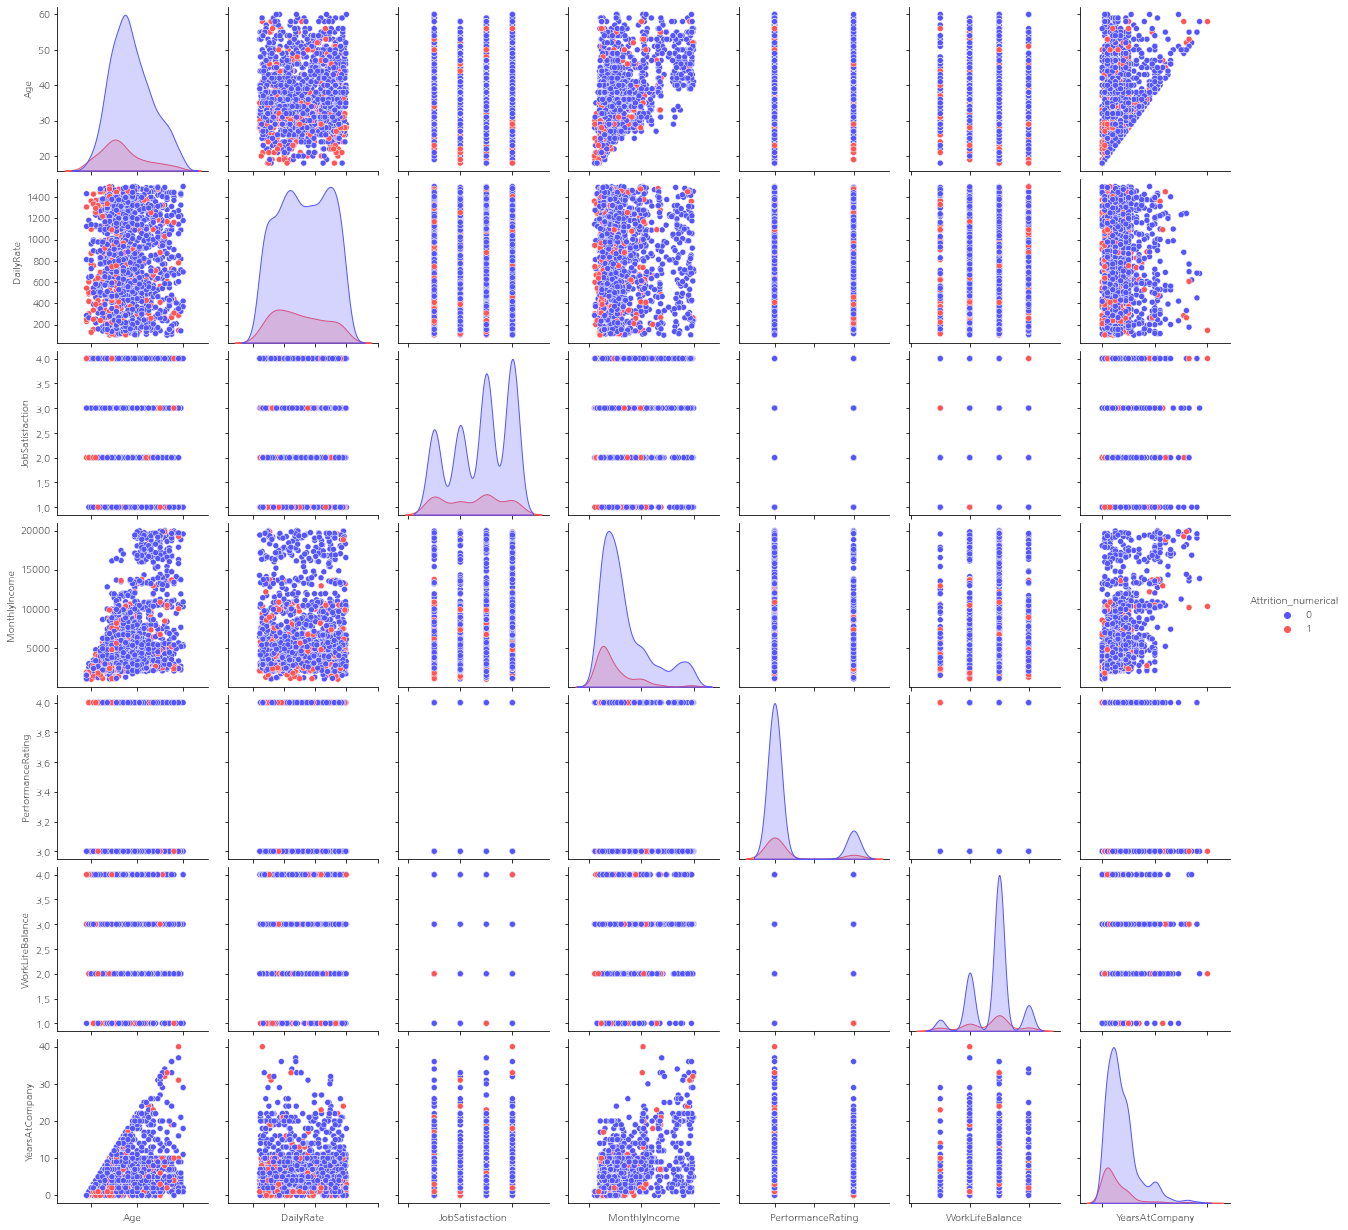

In [ ]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])

##### 상관계수 구하기

* 방법 1

In [ ]:
num_feat = attrition_num.columns.values
comb_num_feat = np.array(list(combinations(num_feat, 2)))
corr_num_feat = np.array([])
for comb in comb_num_feat:
    corr = pearsonr(attrition_num[comb[0]], attrition_num[comb[1]])[0]
    corr_num_feat = np.append(corr_num_feat, corr)

In [ ]:
high_corr_num = comb_num_feat[np.abs(corr_num_feat) >= 0.9]
high_corr_num

array([['JobLevel', 'MonthlyIncome']], dtype='<U24')

* 방법 2

In [ ]:
# plotly 안 보이는 문제 해결
import plotly.io as pio
pio.renderers.default = 'colab'
pio.renderers

data = [
    go.Heatmap(
        z=attrition_num.astype(float).corr().values, # 피어슨 상관계수
        x=attrition_num.columns.values,
        y=attrition_num.columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
        
    )
]


layout = go.Layout(
    title='숫자형 Feature 들의 피어슨 상관계수',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')



##### Feature 제거

In [ ]:
attrition_num = attrition_num.drop(np.unique(high_corr_num[:, 0]), axis=1, errors='ignore')

#### 2) 범주형 Feature
  * 데이터 확인

##### 데이터 확인

In [ ]:
attrition_cat_dummies.nunique().sort_values()

BusinessTravel_Non-Travel            2
MaritalStatus_Single                 2
MaritalStatus_Married                2
MaritalStatus_Divorced               2
JobRole_Sales Representative         2
JobRole_Sales Executive              2
JobRole_Research Scientist           2
JobRole_Research Director            2
JobRole_Manufacturing Director       2
JobRole_Manager                      2
JobRole_Laboratory Technician        2
JobRole_Human Resources              2
JobRole_Healthcare Representative    2
Gender_Male                          2
Gender_Female                        2
EducationField_Technical Degree      2
EducationField_Other                 2
EducationField_Medical               2
EducationField_Marketing             2
EducationField_Life Sciences         2
EducationField_Human Resources       2
Department_Sales                     2
Department_Research & Development    2
Department_Human Resources           2
BusinessTravel_Travel_Rarely         2
BusinessTravel_Travel_Fre

In [ ]:
attrition_cat_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in attrition_cat_dummies:
  col = []
  for var2 in attrition_cat_dummies :
    cramers =cramers_V(attrition_cat_dummies[var1], attrition_cat_dummies[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = attrition_cat_dummies.columns, index =attrition_cat_dummies.columns)

df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
BusinessTravel_Non-Travel,0.99,0.03,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Frequently,0.03,1.00,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
BusinessTravel_Travel_Rarely,0.27,0.56,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Department_Human Resources,0.00,0.00,0.00,0.98,0.08,0.02,0.40,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.80,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0
Department_Research & Development,0.00,0.00,0.00,0.08,1.00,0.82,0.03,0.02,0.23,0.03,0.0,0.0,0.0,0.0,0.05,0.07,0.11,0.00,0.06,0.03,0.13,0.54,0.11,0.0,0.0,0.0,0.0,0.0


In [ ]:
high_corr_num = comb_cat_dummies_feat[np.abs(corr_cat_dummies_feat) >= 0.9]
high_corr_num

array([['Gender_Female', 'Gender_Male'],
       ['OverTime_No', 'OverTime_Yes']], dtype='<U33')

In [ ]:
# Concat the two dataframes together columnwise
###### 코드 작성 부분 시작 ######

###### 코드 작성 부분 마침 ######

In [ ]:
attrition_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


### 6. Target Feature 불균형 문제 처리

#### 1) 불균형 데이터 확인

In [ ]:
data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')

#### 2) SMOTE 를 이용한 오버샘플링 적용

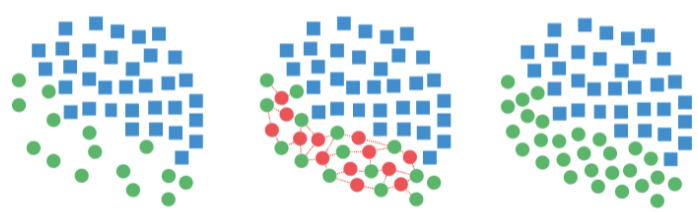

In [ ]:
target = attrition["Attrition_numerical"]

In [ ]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size= 0.80,
                                                         random_state=0);


In [ ]:
###### 코드 작성 부분 시작 ######
# oversampler = 
# smote_train, smote_target =
###### 코드 작성 부분 마침 ######

## 03. 머신러닝 모델링

#### 1) 분석 목표는 '직원 이탈의 주요한 원인(Feature)'

#### 2) RandomForest 분류 모델

##### GridSearchCV 를 이용한 최적 Hyper Parameter 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_params = { 'n_estimators' : [10, 100],
           'max_depth' : [4, 8, 10, 12],
           'min_samples_leaf' : [2, 4, 8, 12],
           'max_features' : [0.1, 0.3, 0.5]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
###### 코드 작성 부분 시작 ######
# rf_clf =
# grid_cv = 
###### 코드 작성 부분 마침 ######
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9135


In [ ]:
seed = 0
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    ###### 코드 작성 부분 시작 ######

    ###### 코드 작성 부분 마침 ######
    'random_state' : seed,
    'verbose': 0
}

In [ ]:
rf = RandomForestClassifier(**rf_params)

##### 모델 성능

In [ ]:
rf.fit(smote_train, smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*60)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.76      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



#### 3) Gradient Boosting 분류 모델

##### GridSearchCV 를 이용한 최적 Hyper Parameter 탐색

In [ ]:
from sklearn.model_selection import GridSearchCV

gb_params = { 'n_estimators' : [1000, 1500],
           'max_depth' : [4, 6],
           'min_samples_leaf' : [2, 4],
           'max_features' : [0.7, 0.9],
           'learning_rate' : [0.25,0.3]
            }

# RandomForest Classifier 객체 생성 후 GridSearchCV 수행
###### 코드 작성 부분 시작 ######
# random_state = 0
# gb_clf = 

# param_grid = gb_params, cv = 3, n_jobs = -1
# grid_cv = 
###### 코드 작성 부분 마침 ######
grid_cv.fit(smote_train, smote_target)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'learning_rate': 0.3, 'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 2, 'n_estimators': 1000}
최고 예측 정확도: 0.9094


In [ ]:
# Gradient Boosting Parameters
seed = 0
gb_params ={
    ##### 코드 작성 #####
    'random_state' : seed,
    'verbose': 0
}

In [ ]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)
gb_predictions = gb.predict(test)

##### 모델 성능

In [ ]:
print("Accuracy score: {}".format(accuracy_score(target_val, gb_predictions)))
print(classification_report(target_val, gb_predictions))

Accuracy score: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       245
           1       0.67      0.37      0.47        49

    accuracy                           0.86       294
   macro avg       0.78      0.67      0.70       294
weighted avg       0.85      0.86      0.85       294



## 04. Feature Importances

#### 1) Random Forest 모델

In [ ]:

trace = go.Scatter(
    ###### 코드 작성 부분 시작 ######
    # y = 
    ###### 코드 작성 부분 마침 ######
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

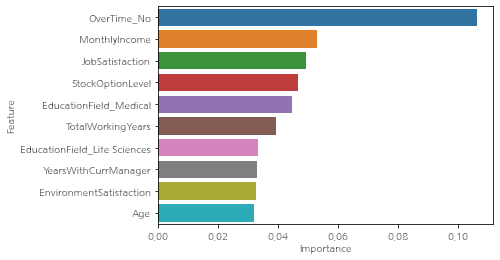

In [ ]:
feat = attrition_final.columns.values
imp = rf.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);

#### 2) Gradient Boosting 모델

In [ ]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

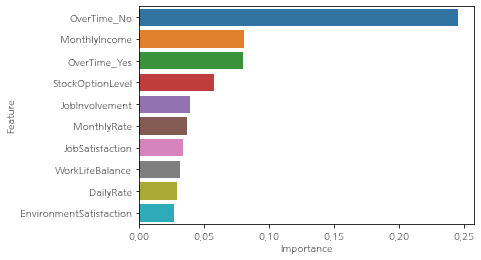

In [ ]:
feat = attrition_final.columns.values
imp = gb.feature_importances_
df = pd.DataFrame({'Feature': feat, 'Importance': imp})
df = df.sort_values('Importance', ascending=False)[:10]
sns.barplot(x='Importance', y='Feature', data=df);